**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Daniel Edgardo García Bonilla
*   MATRÍCULA: A01797180


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
air_df = pd.read_csv("C:\\Users\\dgarc\\OneDrive\\Documentos\\U\\Ciencia de Datos\\LaqnData.csv")

In [3]:
air_df.shape

(43800, 6)

In [4]:
air_df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [5]:
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [6]:
air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [7]:
air_df.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

In [8]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     43800 non-null  object 
 1   Species                  43800 non-null  object 
 2   ReadingDateTime          43800 non-null  object 
 3   Value                    40570 non-null  float64
 4   Units                    43800 non-null  object 
 5   Provisional or Ratified  43800 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.0+ MB


**Porcentaje de valores nulos**

In [9]:
air_df.isna().sum()/43800*100

Site                       0.000000
Species                    0.000000
ReadingDateTime            0.000000
Value                      7.374429
Units                      0.000000
Provisional or Ratified    0.000000
dtype: float64

La columna Value es la única que contiene valores nulos, los cuales representan 7.37% del total

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [10]:
air_df['ReadingDateTime'].unique()

array(['01/01/2017 00:00', '01/01/2017 01:00', '01/01/2017 02:00', ...,
       '31/12/2017 21:00', '31/12/2017 22:00', '31/12/2017 23:00'],
      dtype=object)

In [11]:
air_df[air_df['ReadingDateTime']=='01/01/2017 00:00']

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
8760,CT3,NO2,01/01/2017 00:00,30.8,ug m-3,R
17520,CT3,NOX,01/01/2017 00:00,36.2,ug m-3 as NO2,R
26280,CT3,PM10,01/01/2017 00:00,35.7,ug/m3,R
35040,CT3,PM2.5,01/01/2017 00:00,NaN,ug m-3,R


In [12]:
air_df.nunique()

Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

In [13]:
air_df['Units'].unique()

array(['ug m-3', 'ug m-3 as NO2', 'ug/m3'], dtype=object)

Se tomaron un total de **43,800** mediciones tomando en consideración todas las especies. Existen **8,760** registros de horas diferentes lo cual indica que las medidas se tomaron en 8760 momentos diferentes. Las medidas para las **5 especies** consideradas se tomaron al mismo tiempo. 
Las columnas del dataframe que no agregan información adicional son **Site, Provisional or Ratified y Units** ya que contienen un valor único a lo largo del dataframe.


In [14]:
air_df= air_df[['Species', 'ReadingDateTime', 'Value']]

3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [15]:
air_df['Species'].value_counts()

Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: count, dtype: int64

El valor total de los registros por especie es 43,800 lo cual coincide con el total de mediciones. 

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [16]:
air_df.groupby('Species').mean('Value')

,Value
Species,
NO,15.045115
NO2,38.010185
NOX,61.078661
PM10,22.551704
PM2.5,14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [17]:
pvt_df= pd.pivot_table(air_df, values='Value', columns='Species', index='ReadingDateTime')
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [18]:
pvt_df.describe()

Species,NO,NO2,NOX,PM10,PM2.5
count,8660.000000,8660.000000,8660.000000,8657.000000,5933.000000
mean,15.045115,38.010185,61.078661,22.551704,14.999831
std,26.678565,18.580841,54.584805,15.344755,13.558588
min,-2.000000,2.800000,1.000000,-5.600000,-8.000000
25%,3.100000,23.800000,30.300000,13.900000,7.000000
50%,7.100000,35.300000,46.900000,19.500000,11.000000
75%,15.500000,49.900000,73.800000,27.300000,18.000000
max,401.799990,120.200000,734.299990,633.099980,128.000000


In [19]:
pvt_df[pvt_df['NO']==401.799990]

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
23/01/2017 00:00,401.79999,118.2,734.29999,105.6,120.0


El valor máximo  de NO registrado es de 401.8 correspondiente al 23/01/2017 00:00

In [20]:
pvt_df[pvt_df['PM10']==-5.600000]

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
12/09/2017 23:00,0.1,7.0,7.1,-5.6,NaN


El valor mínimo de PM10 es de -5.6 correspondiente al 12/09/2017 23:00

La mediana del NO es de 7.1, lo cual indica que hay 50% de los datos por arriba y por abajo de ese valor. 
El primer cuartil de PM2.5 es 7, lo que significa que el 25% de los datos están por debajo de 7 y 75% de los registros están por arriba de 7.

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

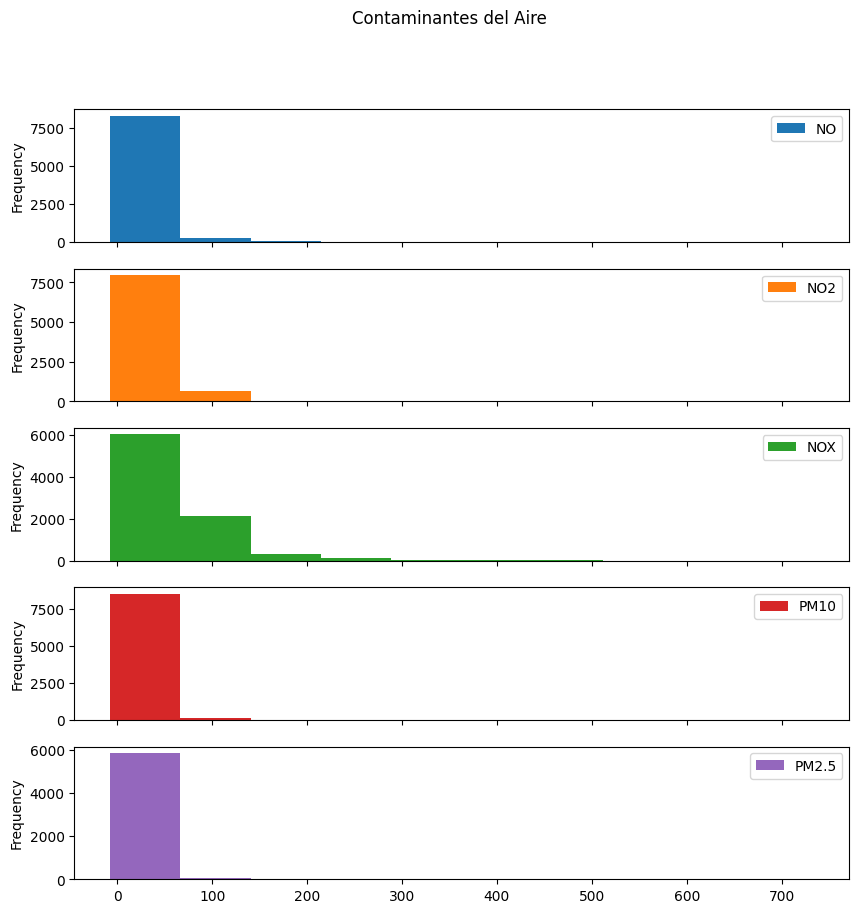

In [21]:

pvt_df.plot(kind='hist', subplots=True, sharex=True, figsize=(10, 10), title='Contaminantes del Aire')

NO          Axes(0.125,0.11;0.133621x0.77)
NO2      Axes(0.285345,0.11;0.133621x0.77)
NOX       Axes(0.44569,0.11;0.133621x0.77)
PM10     Axes(0.606034,0.11;0.133621x0.77)
PM2.5    Axes(0.766379,0.11;0.133621x0.77)
dtype: object

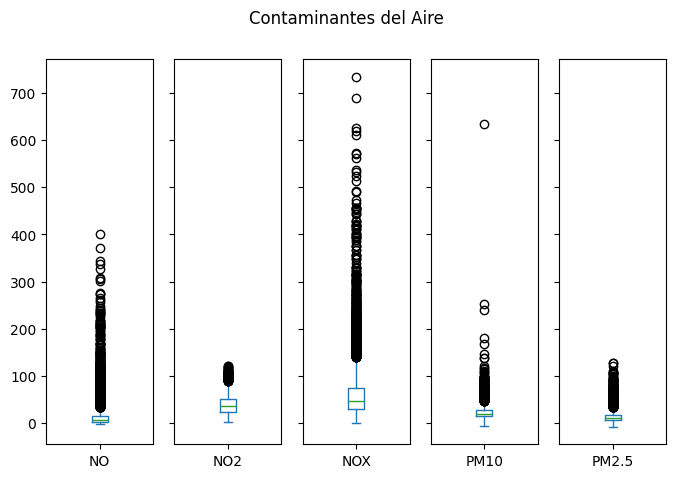

In [22]:
pvt_df.plot(kind='box', subplots=True, sharey= True, figsize=(8,5), title='Contaminantes del Aire')

El elemento que tiene una mayor variabilidad en los datos registrados es el NOX. Los datos de este elemente están más dispersos.

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [23]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
datetime_df.columns = ['Date','Time']
datetime_df
date_df = datetime_df.Date.str.split('/',expand=True)
date_df.columns = ['Day','Month','Year']
date_df
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [24]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

Los resultados difieren en que con unstack la columna species se pasó a columnas de la pivot generada. El resultado del index es que se generó con la fecha es el mismo. 

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

melt() transforma una tabla de formato ancho a largo. Es útil cuando un dataframe cuenta con muchas columnas y queremos verlo en un formato más compacto. De manera opuesta, pivot() transforma un dataframe de formato largo a ancho. 


Mientras que melt() convierte un dataframe a formato largo, unstack lo convierte a formato ancho, por lo tanto es el opuesto a melt().